In [1]:
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import h5py as h5
import matplotlib.pyplot as plt

## Load Data

In [ ]:
## download vae prior data from dataverse
url = "https://dataverse.harvard.edu/api/access/datafile/12108407"
response = requests.get(url)
cnm_v = h5.File(io.BytesIO(response.content), 'r')['CNM_v']

url = "https://dataverse.harvard.edu/api/access/datafile/12108410"
response = requests.get(url)
wnm_v = h5.File(io.BytesIO(response.content), 'r')['WNM_v']

## Vecolity-integrated CNM vs. WNM Map 

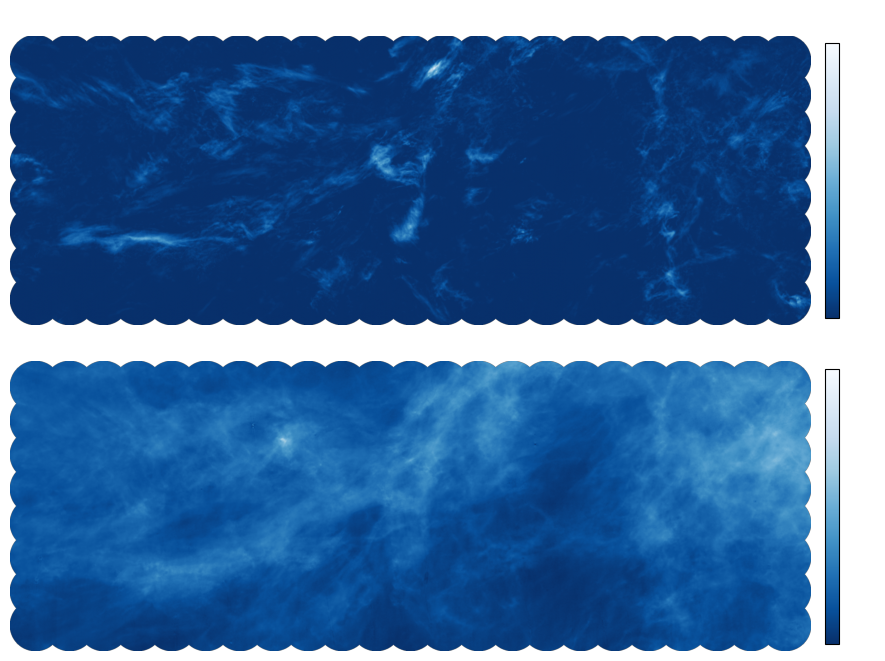

In [20]:
cnm_int = np.sum(cnm_v, axis=0)
wnm_int = np.sum(wnm_v, axis=0)

fig, axes = plt.subplots(2, 1, figsize=(15, 6.5), constrained_layout=True, facecolor='none')    
map_arr = [cnm_int, wnm_int]
vmax_arr = [200, 400]
title_arr = ['SS+VAE CNM', 'SS+VAE WNM']
img_map_arr = []
clip = 32
for i, ax in enumerate(axes.flatten()):
    im=ax.imshow(map_arr[i][clip:-clip,clip:-clip], cmap='Blues_r', vmax=vmax_arr[i])
    ax.set_title(title_arr[i], fontsize=16, color='w')
    ax.grid(False)
    ax.axis('off')
    cbar = plt.colorbar(im, ax=ax, pad=0.01, shrink=0.95)
    cbar.ax.xaxis.set_label_position('top')
    cbar.ax.set_xlabel(f'$\\mathrm{{K km/s}}$', fontsize=12, labelpad=10, color='w')
    cbar.ax.tick_params(colors='w')
plt.show()

## Velocity-resolved CNM vs. WNM Map 

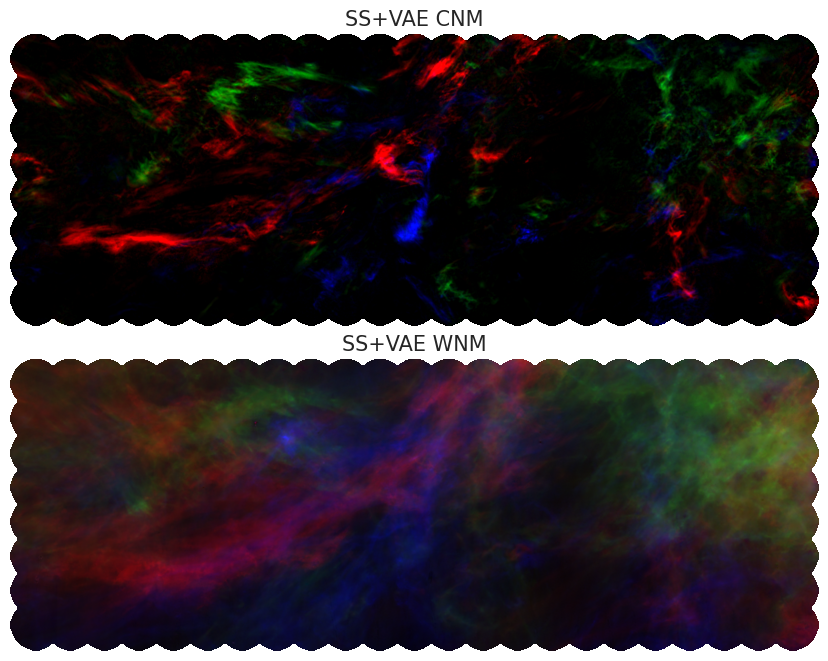

In [47]:
sns.set_theme()
fig, axes = plt.subplots(2, 1, figsize=(16, 6.5), constrained_layout=True, facecolor='none')
titles = ['SS+VAE CNM', 'SS+VAE WNM']
clip = 32

idx_select = [np.arange(11,25), np.arange(8, 11), np.arange(0,8)]
cnm_map = np.array([cnm_v[idx].sum(0) for idx in idx_select])
wnm_map = np.array([wnm_v[idx].sum(0) for idx in idx_select])
cnm_map = np.moveaxis(cnm_map,0,-1)
wnm_map = np.moveaxis(wnm_map,0,-1) 
cnm_map = np.clip((cnm_map - np.nanmin(cnm_map))/60, 0, 1) # rescale for rgb visualization
wnm_map = (wnm_map - np.nanmin(wnm_map))/(np.nanmax(wnm_map) - np.nanmin(wnm_map))
for i, ax in enumerate(axes.flatten()):
    if i == 0:
        im=ax.imshow(cnm_map[clip:-clip,clip:-clip], cmap='grey', vmax=0.1)
    else:
        im=ax.imshow(wnm_map[clip:-clip,clip:-clip], cmap='grey')
    ax.grid(False)
    ax.axis('off')
    ax.set_title(titles[i], fontsize=15)
plt.show()